In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
genome = pd.read_csv('genome-scores.csv')
movies = pd.read_csv('movies_updated.csv', encoding = "ISO-8859-1")
ratings = pd.read_csv('ratings_updated.csv')
users = pd.read_csv('users.csv')

In [8]:
ratings.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
users.loc[500]

userId         3584.000
rated_count      20.000
avg_rating        2.875
Name: 500, dtype: float64

In [22]:
model500 = ratings.loc[ratings['userId'] == 3584]

In [27]:
model500 = model500.sort_values('timestamp')

In [30]:
genome = genome.pivot(index='movieId', columns='tagId', values='relevance')

In [33]:
model500 = model500.join(genome, on='movieId', how='left')

In [37]:
model500 = model500.set_index('movieId')

In [39]:
model500.drop(['userId', 'timestamp'], axis=1, inplace=True)

In [40]:
model500

,rating,1,2,3,4,5,6,7,8,9,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1378,2.0,0.04825,0.05250,0.02725,0.03825,0.10625,0.05875,0.09375,0.17550,0.62300,...,0.05350,0.02575,0.01725,0.04100,0.16925,0.05075,0.02125,0.01775,0.08900,0.01875
4002,3.5,0.03550,0.03550,0.02175,0.04375,0.08300,0.09600,0.05550,0.22125,0.48525,...,0.04575,0.01825,0.02025,0.07550,0.29175,0.08500,0.01925,0.01975,0.09250,0.02025
637,5.0,0.13075,0.15950,0.02675,0.03650,0.05350,0.12600,0.02450,0.12000,0.03100,...,0.04275,0.02525,0.05400,0.02450,0.12550,0.03525,0.02575,0.00800,0.06400,0.01375
1296,3.5,0.02550,0.02850,0.88675,0.18500,0.23800,0.10050,0.14300,0.13550,0.13225,...,0.06225,0.12500,0.03925,0.06250,0.22400,0.12075,0.03100,0.02725,0.07475,0.01975
3317,4.0,0.02800,0.02700,0.04950,0.07100,0.12550,0.09525,0.06000,0.40500,0.09200,...,0.09350,0.02575,0.01950,0.99675,0.97575,0.94175,0.02875,0.01825,0.10025,0.02125
866,3.0,0.02850,0.03000,0.03875,0.07000,0.17175,0.18100,0.02575,0.15550,0.08225,...,0.07350,0.02300,0.01475,0.02900,0.22525,0.10700,0.02500,0.01325,0.08975,0.02125
222,1.0,0.02700,0.03225,0.16475,0.09300,0.14700,0.33450,0.03675,0.15375,0.10250,...,0.06225,0.02475,0.01325,0.11100,0.26100,0.09050,0.02100,0.01275,0.04950,0.01525
2087,2.5,0.02800,0.03350,0.14425,0.09825,0.15550,0.18575,0.06350,0.13650,0.08700,...,0.09100,0.05925,0.03825,0.04525,0.12050,0.03075,0.01350,0.02800,0.10875,0.02025
3396,0.5,0.05950,0.07000,0.05325,0.08900,0.16450,0.08075,0.02525,0.36025,0.38175,...,0.05000,0.01875,0.02475,0.04350,0.17125,0.11250,0.05025,0.01600,0.06200,0.01775


In [41]:
X= model500.drop('rating', axis=1)
y= model500[['rating']]

In [43]:
y

,rating
movieId,
1378,2.0
4002,3.5
637,5.0
1296,3.5
3317,4.0
866,3.0
222,1.0
2087,2.5
3396,0.5


In [133]:
y_test = np.array(y.iloc[-1:]['rating'])
y_train = np.array(y.iloc[:-1]['rating'])
X_test = X.iloc[-1:]
X_train = X.iloc[:-1]

In [134]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1378,0.04825,0.05250,0.02725,0.03825,0.10625,0.05875,0.09375,0.17550,0.62300,0.11250,...,0.05350,0.02575,0.01725,0.04100,0.16925,0.05075,0.02125,0.01775,0.08900,0.01875
4002,0.03550,0.03550,0.02175,0.04375,0.08300,0.09600,0.05550,0.22125,0.48525,0.04225,...,0.04575,0.01825,0.02025,0.07550,0.29175,0.08500,0.01925,0.01975,0.09250,0.02025
637,0.13075,0.15950,0.02675,0.03650,0.05350,0.12600,0.02450,0.12000,0.03100,0.01925,...,0.04275,0.02525,0.05400,0.02450,0.12550,0.03525,0.02575,0.00800,0.06400,0.01375
1296,0.02550,0.02850,0.88675,0.18500,0.23800,0.10050,0.14300,0.13550,0.13225,0.34775,...,0.06225,0.12500,0.03925,0.06250,0.22400,0.12075,0.03100,0.02725,0.07475,0.01975
3317,0.02800,0.02700,0.04950,0.07100,0.12550,0.09525,0.06000,0.40500,0.09200,0.07325,...,0.09350,0.02575,0.01950,0.99675,0.97575,0.94175,0.02875,0.01825,0.10025,0.02125
866,0.02850,0.03000,0.03875,0.07000,0.17175,0.18100,0.02575,0.15550,0.08225,0.03075,...,0.07350,0.02300,0.01475,0.02900,0.22525,0.10700,0.02500,0.01325,0.08975,0.02125
222,0.02700,0.03225,0.16475,0.09300,0.14700,0.33450,0.03675,0.15375,0.10250,0.14725,...,0.06225,0.02475,0.01325,0.11100,0.26100,0.09050,0.02100,0.01275,0.04950,0.01525
2087,0.02800,0.03350,0.14425,0.09825,0.15550,0.18575,0.06350,0.13650,0.08700,0.07150,...,0.09100,0.05925,0.03825,0.04525,0.12050,0.03075,0.01350,0.02800,0.10875,0.02025
3396,0.05950,0.07000,0.05325,0.08900,0.16450,0.08075,0.02525,0.36025,0.38175,0.03275,...,0.05000,0.01875,0.02475,0.04350,0.17125,0.11250,0.05025,0.01600,0.06200,0.01775


In [135]:
X_test

,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
2371,0.04375,0.0595,0.05225,0.12425,0.1465,0.09575,0.03925,0.2085,0.73825,0.0425,...,0.0435,0.01625,0.0135,0.06875,0.2275,0.0835,0.0345,0.01425,0.08275,0.0195


In [105]:
y_train.mean()

2.75

In [72]:
from sklearn.linear_model import LinearRegression

In [112]:
LR = LinearRegression()

In [136]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [140]:
myround(LR.predict(X_test))

3.5

In [138]:
y_test

array([ 4.])

In [127]:
def myround(x, prec=2, base=0.5):
    return round(base * round(float(x)/base),prec)

# Build a function that gets yhat from a userId number

In [187]:
def get_yhat(n): #Linear Regression, no Regularization
    
    # first step: get the movies that the user rated
    user_n_df = ratings.loc[ratings['userId'] == n]
    user_n_df = user_n_df.sort_values('timestamp')
    
    # Now join the movies to the genome
    user_n_df = user_n_df.join(genome, on='movieId', how='left')
    
    # prep the df for modeling
    user_n_df = user_n_df.set_index('movieId')
    user_n_df.drop(['userId', 'timestamp'], axis=1, inplace=True)
                   
    #train test split
    X= user_n_df.drop('rating', axis=1)
    y= user_n_df[['rating']]
                   
    y_test = np.array(y.iloc[-1:]['rating'])
    y_train = np.array(y.iloc[:-1]['rating'])
    X_test = X.iloc[-1:]
    X_train = X.iloc[:-1]
    
    #fit model
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    
    #fix y_hat
    y_hat = myround(LR.predict(X_test))
    
    if y_hat > 5:
        y_hat = 5
    
    if y_hat < 0:
        y_hat = 0
    
    #return adjusted prediction and y_test
    return y_hat, y_test[0]

In [189]:
get_yhat(users.loc[137400]['userId'])

(5, 4.0)

In [159]:
users.shape

(138493, 3)

In [162]:
eval_list = []
for num in range(0, 138493, 100):
    eval_list.append(num)

In [164]:
evaluation_users = users.loc[eval_list]

In [168]:
evaluation_users.shape

(1385, 5)

In [173]:
get_yhat(evaluation_users.loc[138400]['userId'])

(2.5, 2.0)

# Linear Regression Model

In [176]:
y_hat_list = []
y_true_list = []
for num in range(0, 138500, 100): #it's 138500 so it will run the last one
    y_hat, y_true = get_yhat(evaluation_users.loc[num]['userId'])
    y_hat_list.append(y_hat)
    y_true_list.append(y_true)
    print(y_hat, y_true)
#computer finished this in 3 min 45 sec

3.5 3.0
4.0 1.0
3.5 4.5
2.5 2.0
4.0 3.5
3.5 4.0
3.0 2.0
4.0 5.0
0.5 2.0
3.5 5.0
3.5 2.5
3.0 3.0
5.0 4.5
3.5 4.0
4.5 5.0
3.5 4.0
3.5 0.5
4.5 4.5
3.0 3.0
2.5 5.0
4.0 3.0
3.0 0.5
3.0 2.5
4.0 4.5
1.5 1.5
2.5 3.5
3.0 3.5
2.5 3.5
4.5 3.0
3.5 3.0
3.0 5.0
4.0 4.5
3.5 5.0
3.5 3.0
2.0 2.5
3.5 3.0
3.0 4.0
3.0 3.5
5.5 5.0
4.5 4.0
4.0 5.0
5.0 3.0
4.5 4.5
1.0 0.5
4.5 4.0
4.5 3.0
3.0 5.0
3.0 5.0
4.0 4.5
4.5 4.0
4.0 5.0
3.0 3.0
3.5 4.5
3.5 4.0
3.5 3.0
3.5 3.0
3.5 4.5
5.0 5.0
5.0 4.0
3.0 3.0
3.5 3.0
2.5 0.5
5.0 3.0
3.0 3.0
0.5 1.0
5.0 5.0
4.0 3.5
4.0 5.0
3.0 3.0
4.0 4.0
5.0 5.0
3.5 3.0
4.5 4.5
5.0 5.0
4.0 5.0
3.5 5.0
4.0 4.5
4.5 4.0
4.0 5.0
3.5 5.0
4.0 4.0
3.0 3.0
3.0 2.0
3.0 5.0
3.5 3.5
5.0 5.0
3.0 3.0
4.0 4.0
5.0 4.5
4.5 4.0
3.5 3.0
4.0 3.0
4.5 5.0
4.0 4.0
4.5 3.0
5.0 5.0
4.0 1.5
3.0 4.0
5.0 3.5
4.0 5.0
4.0 3.0
3.5 3.0
3.5 4.0
3.0 3.0
5.0 5.0
3.5 3.0
2.0 2.0
2.5 1.0
2.0 2.0
3.5 3.0
4.5 4.0
3.0 3.0
3.0 3.0
2.0 2.0
3.0 3.0
3.5 4.0
4.0 4.5
4.5 4.0
4.0 5.0
5.0 5.0
3.5 3.0
4.5 5.0
4.5 4.0
3.0 1.0
3.5 5.0


4.0 5.0
2.5 1.0
3.0 2.5
4.0 4.0
4.5 4.5
3.0 3.0
4.0 4.0
3.5 2.0
3.0 4.0
4.5 3.0
3.5 4.0
3.5 4.0
4.0 4.0
3.0 5.0
4.5 5.0
4.5 3.5
3.5 4.0
4.0 3.0
4.0 4.5
3.5 3.0
3.5 4.0
2.0 3.5
3.0 3.0
5.0 4.0
3.0 3.0
2.5 1.0
4.5 4.0
3.5 5.0
4.5 5.0
3.5 3.5
5.0 5.0
4.5 4.0
5.5 5.0
4.5 4.0
4.0 3.0
3.5 3.0
4.5 4.0
3.0 4.0
4.5 5.0
3.0 2.5
4.5 3.5
3.5 4.0
4.5 4.0
4.0 4.5
4.5 5.0
3.5 2.5
2.5 4.0
3.0 3.0
3.0 3.0
2.0 2.0
3.0 4.0
4.5 4.0
2.5 5.0
4.0 4.0
3.0 3.0
4.0 3.0
4.5 5.0
2.5 4.5
4.5 4.0
3.0 2.5
3.5 3.0
4.5 3.0
4.0 4.0
3.5 4.0
6.0 4.0
4.0 4.5
3.0 4.0
4.0 2.5
2.5 3.5
4.0 5.0
3.0 2.0
4.5 5.0
4.0 2.0
4.0 3.5
4.0 4.5
2.5 3.5
3.0 3.0
3.0 3.0
5.5 5.0
3.5 4.0
3.0 4.0
4.5 4.0
4.5 3.0
4.5 3.0
3.0 3.5
4.5 4.5
5.0 5.0
4.0 5.0
5.0 5.0
2.0 4.5
2.5 5.0
4.0 3.5
4.0 3.5
4.5 3.5
4.0 4.0
3.5 5.0
3.0 3.0
4.5 5.0
3.5 4.5
4.0 4.0
3.0 0.5
4.5 4.0
4.0 5.0
3.5 5.0
3.5 5.0
3.0 3.0
2.0 2.5
4.0 4.0
4.5 5.0
3.5 2.5
3.0 2.0
4.0 4.5
3.5 3.0
4.5 3.5
3.5 3.5
3.5 4.0
5.0 5.0
3.5 3.0
2.5 3.0
3.5 5.0
3.5 5.0
5.5 3.0
3.0 4.0
4.0 4.0
3.0 4.0


In [175]:
print('hello')

hello


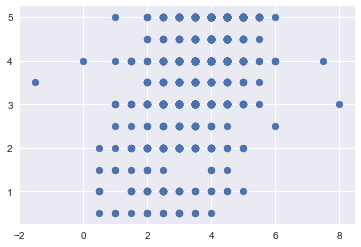

In [178]:
plt.scatter(y_hat_list, y_true_list)

In [179]:
evaluation_users.drop(['yhat','ytrue'], axis=1, inplace=True)

In [181]:
evaluation_users['yhat'] = y_hat_list
evaluation_users['ytrue'] = y_true_list

In [191]:
evaluation_users['yhat'] = evaluation_users['yhat'].apply(lambda x: 0 if x < 0 else x)

In [193]:
evaluation_users['yhat'] = evaluation_users['yhat'].apply(lambda x: 5 if x > 5 else x)

In [196]:
evaluation_users['e2'] = (evaluation_users['yhat'] - evaluation_users['ytrue']) ** 2

In [201]:
import math
math.sqrt( (evaluation_users['e2'].sum() / 1385 ))

1.0128239108395056

In [205]:
evaluation_users.tail()

,userId,rated_count,avg_rating,yhat,ytrue,e2
138000,89081,1528,3.882199,4.0,4.0,0.00
138100,49817,1657,3.564575,4.0,2.5,2.25
138200,56504,1837,3.483125,0.5,1.0,0.25
138300,81706,2081,2.843104,3.5,3.5,0.00
138400,27053,2514,2.812450,2.5,2.0,0.25


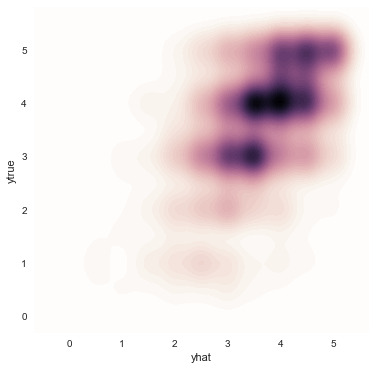

In [204]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
sns.kdeplot(evaluation_users['yhat'], evaluation_users['ytrue'], cmap=cmap, n_levels=60, shade=True);


In [207]:
low = evaluation_users.iloc[:462]
middle = evaluation_users.iloc[462:923]
high = evaluation_users.iloc[923:]

In [208]:
math.sqrt( (low['e2'].sum() / len(low) ))

1.0248534896875139

In [209]:
math.sqrt( (middle['e2'].sum() / len(middle) ))

0.9868989974847693

In [210]:
math.sqrt( (high['e2'].sum() / len(high) ))

1.0261726477695179

In [213]:
evaluation_users.sort_values('e2', ascending=False).head(10)

,userId,rated_count,avg_rating,yhat,ytrue,e2
78400,73072,82,3.585366,1.0,5.0,16.00
91000,14433,110,4.327273,5.0,1.0,16.00
136600,121650,983,3.487284,0.0,4.0,16.00
136400,137976,937,3.241195,4.5,1.0,12.25
137100,66179,1096,3.349909,0.0,3.5,12.25
136000,131395,864,3.203704,4.0,0.5,12.25
75700,10170,77,2.792208,4.5,1.0,12.25
34200,98321,34,2.897059,2.0,5.0,9.00
89800,2166,107,3.158879,3.5,0.5,9.00
63400,22176,60,3.116667,2.0,5.0,9.00


In [214]:
from sklearn.linear_model import BayesianRidge

def get_yhat_bayes(n): #BayesRidge, no Regularization
    
    # first step: get the movies that the user rated
    user_n_df = ratings.loc[ratings['userId'] == n]
    user_n_df = user_n_df.sort_values('timestamp')
    
    # Now join the movies to the genome
    user_n_df = user_n_df.join(genome, on='movieId', how='left')
    
    # prep the df for modeling
    user_n_df = user_n_df.set_index('movieId')
    user_n_df.drop(['userId', 'timestamp'], axis=1, inplace=True)
                   
    #train test split
    X= user_n_df.drop('rating', axis=1)
    y= user_n_df[['rating']]
                   
    y_test = np.array(y.iloc[-1:]['rating'])
    y_train = np.array(y.iloc[:-1]['rating'])
    X_test = X.iloc[-1:]
    X_train = X.iloc[:-1]
    
    #fit model
    BR = BayesianRidge()
    BR.fit(X_train, y_train)
    
    #fix y_hat
    y_hat = myround(BR.predict(X_test))
    
    if y_hat > 5:
        y_hat = 5
    
    if y_hat < 0:
        y_hat = 0
    
    #return adjusted prediction and y_test
    return y_hat, y_test[0]

In [217]:
get_yhat_bayes(73072)

(2.0, 5.0)

In [218]:
y_hat_list_bayes = []
y_true_list_bayes = []
counter = 0
for num in range(0, 138500, 100): #it's 138500 so it will run the last one
    y_hat, y_true = get_yhat_bayes(evaluation_users.loc[num]['userId'])
    y_hat_list_bayes.append(y_hat)
    y_true_list_bayes.append(y_true)
    print(counter, y_hat, y_true)
    counter +=1
# This job finished in 12 min 50 sec

0 3.5 3.0
1 3.0 1.0
2 3.5 4.5
3 2.5 2.0
4 4.0 3.5
5 3.0 4.0
6 3.0 2.0
7 4.0 5.0
8 0.5 2.0
9 3.5 5.0
10 3.5 2.5
11 3.0 3.0
12 4.5 4.5
13 3.5 4.0
14 4.5 5.0
15 3.5 4.0
16 2.5 0.5
17 4.5 4.5
18 3.0 3.0
19 3.5 5.0
20 4.0 3.0
21 2.5 0.5
22 3.0 2.5
23 4.0 4.5
24 2.5 1.5
25 2.5 3.5
26 3.0 3.5
27 2.5 3.5
28 4.5 3.0
29 3.5 3.0
30 3.0 5.0
31 4.0 4.5
32 3.5 5.0
33 3.5 3.0
34 2.0 2.5
35 3.5 3.0
36 3.0 4.0
37 3.0 3.5
38 4.5 5.0
39 4.5 4.0
40 4.0 5.0
41 4.5 3.0
42 4.5 4.5
43 1.0 0.5
44 4.0 4.0
45 4.5 3.0
46 3.0 5.0
47 3.0 5.0
48 4.0 4.5
49 4.5 4.0
50 4.0 5.0
51 3.0 3.0
52 3.5 4.5
53 3.5 4.0
54 3.5 3.0
55 3.5 3.0
56 3.5 4.5
57 5.0 5.0
58 5.0 4.0
59 3.0 3.0
60 3.5 3.0
61 3.0 0.5
62 5.0 3.0
63 3.0 3.0
64 0.5 1.0
65 5.0 5.0
66 4.0 3.5
67 3.0 5.0
68 3.0 3.0
69 4.0 4.0
70 5.0 5.0
71 3.5 3.0
72 4.5 4.5
73 5.0 5.0
74 4.0 5.0
75 3.5 5.0
76 4.0 4.5
77 4.5 4.0
78 4.0 5.0
79 3.5 5.0
80 4.0 4.0
81 3.0 3.0
82 3.0 2.0
83 3.0 5.0
84 3.5 3.5
85 5.0 5.0
86 3.5 3.0
87 3.5 4.0
88 5.0 4.5
89 4.5 4.0
90 3.5 3.0
91 4.0 3.

693 4.5 4.0
694 3.0 3.0
695 2.0 2.0
696 5.0 4.0
697 3.5 4.5
698 4.5 4.5
699 3.5 3.0
700 4.0 4.0
701 2.0 3.5
702 4.0 4.5
703 3.0 4.0
704 4.0 4.0
705 3.0 2.0
706 4.5 3.0
707 3.5 4.0
708 3.0 4.0
709 4.0 4.0
710 4.5 4.5
711 4.0 3.5
712 3.5 3.0
713 5.0 5.0
714 4.0 3.5
715 3.0 4.0
716 3.5 3.0
717 4.5 3.0
718 4.0 4.0
719 4.0 4.5
720 4.0 5.0
721 2.0 0.5
722 3.5 3.0
723 4.0 4.5
724 3.0 4.0
725 4.0 4.0
726 3.0 5.0
727 4.0 4.0
728 3.5 3.0
729 3.5 2.0
730 3.0 4.0
731 4.0 5.0
732 4.0 3.0
733 3.5 5.0
734 3.0 2.5
735 4.0 4.5
736 4.0 2.0
737 3.0 4.0
738 3.0 1.0
739 3.5 3.0
740 4.0 5.0
741 3.5 4.0
742 3.5 5.0
743 4.0 5.0
744 4.0 3.0
745 3.0 3.0
746 3.5 5.0
747 4.0 5.0
748 2.5 3.0
749 3.5 4.0
750 3.0 3.0
751 4.0 4.0
752 4.5 4.5
753 4.5 5.0
754 4.5 5.0
755 4.0 4.0
756 4.5 5.0
757 4.5 1.0
758 3.5 4.0
759 4.5 4.0
760 3.5 3.0
761 3.0 3.5
762 4.0 5.0
763 4.0 4.5
764 3.5 3.0
765 4.0 4.0
766 3.5 4.0
767 3.5 2.0
768 4.0 5.0
769 3.5 4.0
770 4.5 4.5
771 4.0 5.0
772 3.5 4.0
773 3.5 5.0
774 4.0 5.0
775 3.0 2.0
776 

1347 2.5 2.0
1348 3.0 3.0
1349 1.5 2.0
1350 4.5 5.0
1351 4.5 5.0
1352 3.5 4.5
1353 3.5 4.0
1354 2.5 3.0
1355 5.0 5.0
1356 3.0 4.0
1357 4.5 4.5
1358 4.0 4.0
1359 3.5 3.0
1360 2.5 0.5
1361 3.0 3.0
1362 2.5 2.0
1363 4.5 4.0
1364 1.0 1.0
1365 2.5 3.0
1366 4.0 4.0
1367 3.5 3.5
1368 4.5 4.5
1369 4.0 4.0
1370 4.0 4.0
1371 3.0 3.5
1372 3.5 2.5
1373 3.0 3.0
1374 4.0 4.0
1375 3.5 3.0
1376 3.0 3.0
1377 3.5 3.5
1378 3.5 3.5
1379 3.5 3.5
1380 4.0 4.0
1381 3.5 2.5
1382 1.0 1.0
1383 3.5 3.5
1384 2.0 2.0


In [219]:
evaluation_users['yhat_bayes'] = y_hat_list_bayes
evaluation_users['ytrue_bayes'] = y_true_list_bayes

In [221]:
evaluation_users['e2_bayes'] = (evaluation_users['yhat_bayes'] - evaluation_users['ytrue_bayes']) ** 2

In [229]:
math.sqrt( (evaluation_users['e2_bayes'].sum() / 1385 ))

0.9086428170370735

In [227]:
evaluation_users.sort_values('e2', ascending=False).head(10)

,userId,rated_count,avg_rating,yhat,ytrue,e2,yhat_bayes,ytrue_bayes,e2_bayes
78400,73072,82,3.585366,1.0,5.0,16.00,2.0,5.0,9.00
91000,14433,110,4.327273,5.0,1.0,16.00,4.0,1.0,9.00
136600,121650,983,3.487284,0.0,4.0,16.00,4.0,4.0,0.00
136400,137976,937,3.241195,4.5,1.0,12.25,1.0,1.0,0.00
137100,66179,1096,3.349909,0.0,3.5,12.25,3.0,3.5,0.25
136000,131395,864,3.203704,4.0,0.5,12.25,2.5,0.5,4.00
75700,10170,77,2.792208,4.5,1.0,12.25,4.5,1.0,12.25
34200,98321,34,2.897059,2.0,5.0,9.00,2.5,5.0,6.25
89800,2166,107,3.158879,3.5,0.5,9.00,3.5,0.5,9.00
63400,22176,60,3.116667,2.0,5.0,9.00,2.5,5.0,6.25


In [228]:
evaluation_users.sort_values('e2_bayes', ascending=False).head(10)

,userId,rated_count,avg_rating,yhat,ytrue,e2,yhat_bayes,ytrue_bayes,e2_bayes
75700,10170,77,2.792208,4.5,1.0,12.25,4.5,1.0,12.25
13700,41872,24,3.520833,4.5,1.5,9.00,4.5,1.5,9.00
89800,2166,107,3.158879,3.5,0.5,9.00,3.5,0.5,9.00
112500,5239,203,3.886700,3.0,0.5,6.25,3.5,0.5,9.00
31100,24288,32,3.781250,4.0,1.0,9.00,4.0,1.0,9.00
91000,14433,110,4.327273,5.0,1.0,16.00,4.0,1.0,9.00
94500,53072,119,4.285714,2.0,1.0,1.00,4.0,1.0,9.00
26800,86827,30,3.100000,4.0,1.0,9.00,4.0,1.0,9.00
66400,7579,63,3.746032,3.5,1.0,6.25,4.0,1.0,9.00
44700,94649,42,3.702381,2.5,0.5,4.00,3.5,0.5,9.00


In [230]:
low = evaluation_users.iloc[:462]
middle = evaluation_users.iloc[462:923]
high = evaluation_users.iloc[923:]

print('low', math.sqrt( (low['e2_bayes'].sum() / len(low) )))
print('middle', math.sqrt( (middle['e2_bayes'].sum() / len(middle) )))
print('high', math.sqrt( (high['e2_bayes'].sum() / len(high) )))

low 0.9880235200593537
middle 0.9279931931832044
high 0.7997564564355761


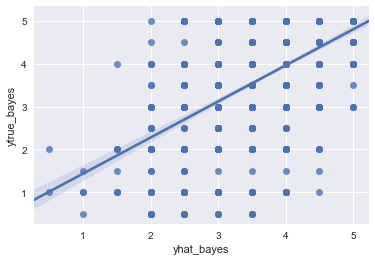

In [234]:
sns.regplot(x='yhat_bayes', y='ytrue_bayes', data=evaluation_users)

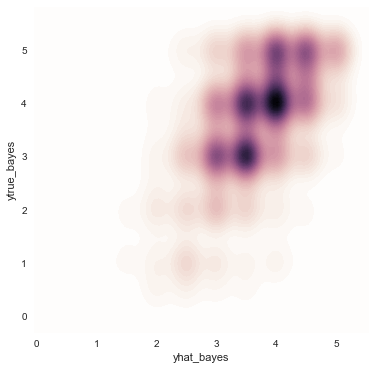

In [238]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
sns.kdeplot(evaluation_users['yhat_bayes'], evaluation_users['ytrue_bayes'], cmap=cmap, n_levels=60, shade=True);

In [239]:
evaluation_users.to_csv('evaluation_users.csv')

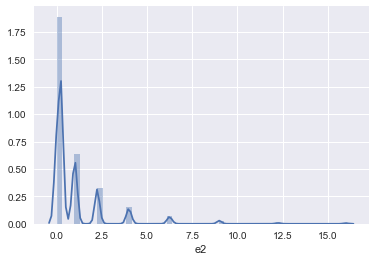

In [245]:
sns.distplot(evaluation_users['e2'])

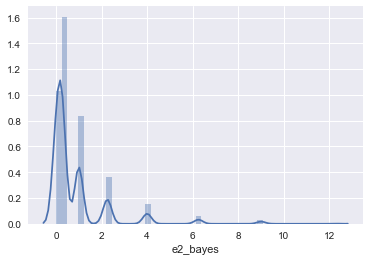

In [242]:
sns.distplot(evaluation_users['e2_bayes'])

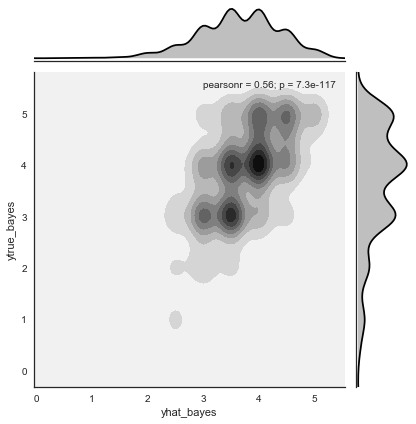

In [249]:
with sns.axes_style("white"):
    sns.jointplot(evaluation_users['yhat_bayes'], evaluation_users['ytrue_bayes'], kind="kde", color="k");

In [250]:
movies.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [251]:
movies.columns

Index(['movieId', 'title', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [261]:
romance_corpus= movies.loc[movies['Romance'] == 1][['movieId']]
#1754 Rows

In [285]:
user_3584 = ratings.loc[ratings['userId'] == 3584]

In [284]:
r_3584= romance_corpus.merge(user_3584, how='left', left_on='movieId', right_on='movieId')

In [300]:
r_3584 = r_3584.loc[r_3584['userId'].isnull()][['movieId']]

In [303]:
r_3584 = r_3584.join(genome, on='movieId', how='left')

In [305]:
r_3584.set_index('movieId', inplace=True)

In [307]:
user_3584 = user_3584.join(genome, on='movieId', how='left')

In [309]:
user_3584.set_index('movieId', inplace=True)

In [312]:
user_3584.drop(['userId', 'timestamp'], axis=1, inplace=True)

In [313]:
user_3584.head()

,rating,1,2,3,4,5,6,7,8,9,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
222,1.0,0.02700,0.03225,0.16475,0.09300,0.14700,0.33450,0.03675,0.15375,0.10250,...,0.06225,0.02475,0.01325,0.11100,0.26100,0.09050,0.02100,0.01275,0.04950,0.01525
307,1.5,0.02075,0.02150,0.04525,0.09500,0.06125,0.08125,0.03175,0.13625,0.02375,...,0.05275,0.02375,0.02375,0.08275,0.25775,0.09600,0.06500,0.00950,0.05500,0.01775
637,5.0,0.13075,0.15950,0.02675,0.03650,0.05350,0.12600,0.02450,0.12000,0.03100,...,0.04275,0.02525,0.05400,0.02450,0.12550,0.03525,0.02575,0.00800,0.06400,0.01375
799,3.0,0.02250,0.02400,0.02675,0.05475,0.06200,0.05950,0.02800,0.10525,0.13300,...,0.04850,0.01925,0.01525,0.04350,0.21300,0.05475,0.04000,0.01225,0.25925,0.03150
866,3.0,0.02850,0.03000,0.03875,0.07000,0.17175,0.18100,0.02575,0.15550,0.08225,...,0.07350,0.02300,0.01475,0.02900,0.22525,0.10700,0.02500,0.01325,0.08975,0.02125


In [314]:
BR = BayesianRidge()

In [315]:
BR.fit(user_3584.drop('rating', axis=1), user_3584['rating'])

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [317]:
y_hat = BR.predict(r_3584)

In [318]:
r_3584['yhat'] = y_hat

In [319]:
r_3584.head()

,1,2,3,4,5,6,7,8,9,10,...,1120,1121,1122,1123,1124,1125,1126,1127,1128,yhat
movieId,,,,,,,,,,,,,,,,,,,,,
3,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850,2.880350
4,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300,2.863060
7,0.04575,0.05275,0.16675,0.08275,0.11450,0.15625,0.05025,0.11175,0.03950,0.08000,...,0.02825,0.01200,0.03575,0.13000,0.04875,0.01975,0.01050,0.10925,0.01850,2.864099
11,0.04275,0.04925,0.23150,0.06250,0.11050,0.08075,0.03800,0.18950,0.11000,0.03100,...,0.03375,0.07300,0.02000,0.18600,0.10825,0.01675,0.03900,0.05950,0.01625,2.870474
15,0.04625,0.05125,0.39350,0.03025,0.07700,0.05500,0.01850,0.03575,0.04275,0.06500,...,0.01650,0.01075,0.01750,0.17300,0.01550,0.01600,0.00700,0.12200,0.01775,2.864163


In [323]:
r_3584= r_3584[['yhat']]

In [326]:
r_3584 = r_3584.sort_values('yhat', ascending=False)

In [329]:
r_3584.reset_index(inplace=True)

In [343]:
top5 = r_3584.head()

In [344]:
top5

,movieId,yhat
0,3868,2.924655
1,1923,2.917726
2,35836,2.915775
3,52245,2.913875
4,4247,2.913107


In [354]:
top5.merge(movies, left_on='movieId', right_on='movieId', how='left')

,movieId,yhat,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3868,2.924655,"Naked Gun: From the Files of Police Squad!, Th...",1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1923,2.917726,There's Something About Mary (1998),0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35836,2.915775,"40-Year-Old Virgin, The (2005)",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,52245,2.913875,Blades of Glory (2007),0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4247,2.913107,Joe Dirt (2001),0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [372]:
def get_recommendations(user_number, genre='Romance'):

    #get user data
    user_profile = ratings.loc[ratings['userId'] == user_number]
    
    #subset the movies by genre, take out the movies the user has seen
    movies_subset =  movies.loc[movies[genre] == 1][['movieId']]
    movies_subset = movies_subset.merge(user_profile, how='left', left_on='movieId', right_on='movieId')
    movies_subset = movies_subset.loc[movies_subset['userId'].isnull()][['movieId']]
    
    ## now join with the genome
    movies_subset = movies_subset.join(genome, on='movieId', how='left')
    movies_subset.set_index('movieId', inplace=True)
    
    ## join the user profile with the genome and prepare for model fit
    user_profile = user_profile.join(genome, on='movieId', how='left')
    user_profile.set_index('movieId', inplace=True)
    user_profile.drop(['userId', 'timestamp'], axis=1, inplace=True)
    
    #train the model
    BR = BayesianRidge()
    BR.fit(user_profile.drop('rating', axis=1), user_profile['rating'])
    
    #predict and get the y_hat
    y_hat = BR.predict(movies_subset)
    movies_subset['yhat'] = y_hat
    movies_subset= movies_subset[['yhat']]
    movies_subset.sort_values('yhat', ascending=False, inplace=True)
    movies_subset.reset_index(inplace=True)
    
    #return top 5
    movies_subset.head()
    
    return movies_subset.head().merge(movies, left_on='movieId', right_on='movieId', how='left')
    

In [378]:
get_recommendations(3584, genre='Horror')

,movieId,yhat,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3785,2.921539,Scary Movie (2000),0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6888,2.915442,Scary Movie 3 (2003),0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,99787,2.912171,"Haunted House, A (2013)",0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,7319,2.911448,Club Dread (2004),0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,8874,2.910100,Shaun of the Dead (2004),0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [379]:
#27053
get_recommendations(27053, genre='Comedy')

,movieId,yhat,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,118890,3.969187,Bill Hicks: Relentless (1992),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,116897,3.616490,Wild Tales (2014),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,127198,3.595085,Dope (2015),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,106749,3.590459,Mr. Morgan's Last Love (2013),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,126599,3.569196,The Little Death (2014),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
